<div style="text-align:center; color:red">
    <h1>Project : Titanic - Machine Learning from Disaster</h1>
</div>


## Table of Contents


* [1. Introduction](#introduction)
* [2. Data Pre-processing](#data-pre-processing)
* [3. Exploratory Data Analysis (EDA)](#eda)
* [4. Feature Engineering & Data Wrangling](#feature-engineering-&-data-wrangling)
* [5. Model Training](#model-training)

<div style="text-align:left; color:blue">
    <h2>1. Introduction</h2>
</div>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although threr was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

This challenge askes to complete the analysis of what sorts of people were likely to survive. In particular, it askes to apply the tools of machine learning to predict which passengers survived the tragely.


<div style="text-align:left; color:blue">
    <h2>2. Data Pre-processing</h2>
</div>

In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./Dataset/train.csv")
test_df = pd.read_csv("./Dataset/test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Data Dictionary**

| Variable  | Definition                          | Key                                               |
|-----------|------------------------------------|---------------------------------------------------|
| survival  | Survival                           | 0 = No, 1 = Yes                                   |
| pclass    | Ticket class                       | 1 = 1st, 2 = 2nd, 3 = 3rd                         |
| sex       | Sex                                |                                                   |
| Age       | Age in years                       |                                                   |
| sibsp     | # of siblings / spouses aboard the Titanic |                                               |
| parch     | # of parents / children aboard the Titanic |                                               |
| ticket    | Ticket number                      |                                                   |
| fare      | Passenger fare                     |                                                   |
| cabin     | Cabin number                       |                                                   |
| embarked  | Port of Embarkation                | C = Cherbourg, Q = Queenstown, S = Southampton    |


In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId**

The first column is the passenger ID. The ID for a passenger is juste a number to identify this passenger in this dataset. So this column is not really a part of the information we need to care about. We can drop this column or make it the index of this dataset. So, let's make it the index for the dataset just to demonstrate the use of df.set_index method.

In [6]:
train_df.set_index(train_df.PassengerId, inplace = True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# drop all PassengerId column
train_df.drop('PassengerId', axis =1, inplace = True)

In [9]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
test_df = pd.read_csv('./Dataset/test.csv', index_col="PassengerId")

In [11]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<div style="text-align:left; color:green">
    <h3>2.1 Feature Classification : Categorical vs Numerical</h3>
</div>


* This helps us select the appropriate plots for visualization.

#### Which features are categorical?

* Categorical Features: `nominal`, `ordinal`, `interval`, `ratio`
* To classify the samples into sets of similar samples

#### Which features are numerical?

* Numerical features: `discrete`, `continuous`, or `timeseries`
* These values change from sample to sample

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical : `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal),`SibSp`, `Parch`
    * `Embarked` : Port of Embarkation - C=Cherbourg, Q=Queenstown, S=Southampon
* Numerical : (continuous) `Age`, `Fare`
* Mix types of data : `Ticket`, `Cabin`
* Blank or Null : `Cabin` > `Age` > `Embarked`
* Various Data Type : String, Int, Float

According to the data dictionary, we know that if a passenger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flage for the person's survivorship. Yet the data type of the column is int64, which is a numerical type. We can change that with the following command.

In [14]:
train_df['Survived']=train_df['Survived'].astype('category')

In [15]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.5+ KB


##### Function to convert these columns from int64 to category type

In [17]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        #df.Pclass, df."Pclass" => df['Pclass']
        df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.1+ KB


#### 2.1.1 Distribution of Numerical feature values across the samples

In [19]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### 2.1.2 Distribution of Categorical features

In [20]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


* There is a total of 891 entries. Among these passengers, 549 survived, and 324 did not survive. 
* The passengers are divided into three classes (Pclass), with class 3 being the most frequent.
* Most passengers are male (577 out of 891).
* Regarding family relationships on board, most passengers have neither siblings/spouses (SibSp) nor parents/children (Parch) on board. 
* Most passengers embarked from port Southampton. There are two missing values in "Embarked" column.

<div style="text-align:left; color:blue">
    <h2>3. Exploratory Data Analysis (EDA)</h2>
    <a class="anchor" id="ida"></a>
</div>

<div style="text-align:left; color:green">
    <h3>3.1 Correlating categorical features</h3>
</div>

* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`(ordinal), `SibSp`, `Parch`
* Target variable: `Survived`

#### `Survived`

In [21]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [22]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance.`

#### `Sex`

In [23]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


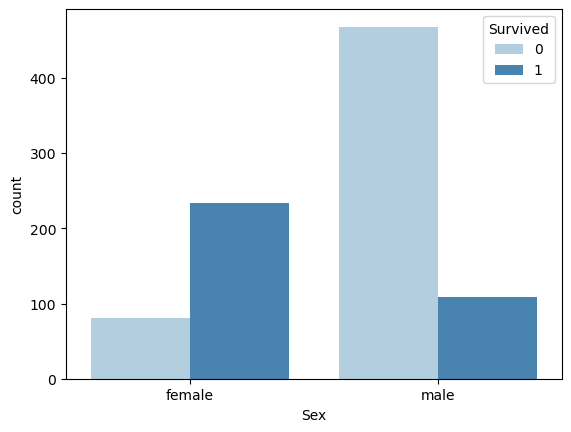

In [24]:
sns.countplot(data=train_df, x='Sex', hue=train_df['Survived'].astype(str), palette = 'Blues');

- Remaining Categorical Feature Columns

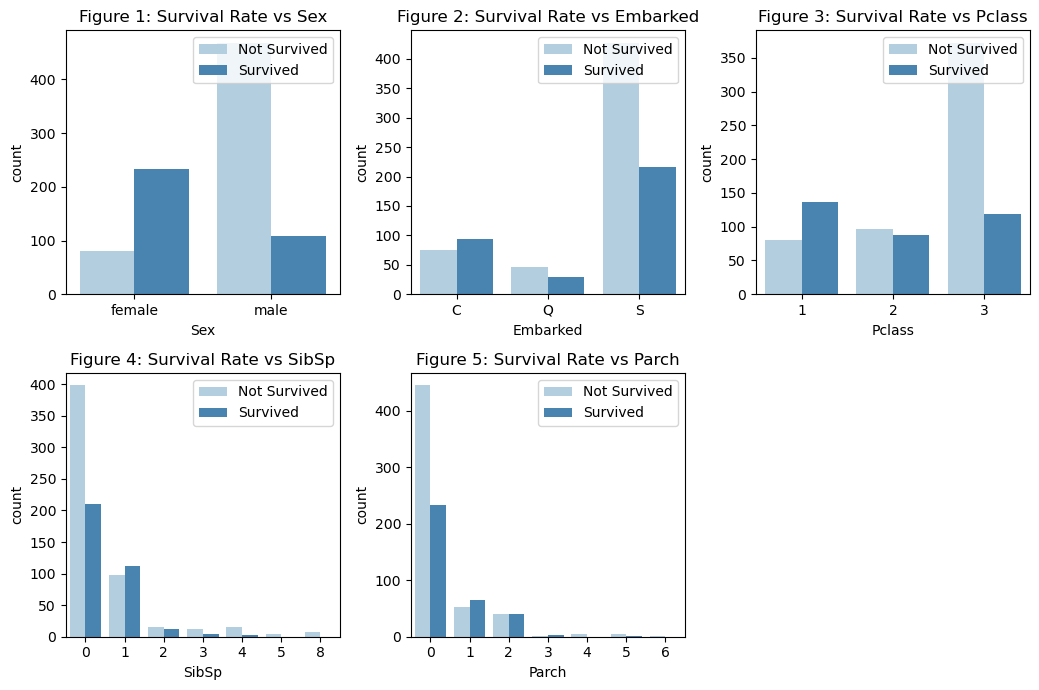

In [25]:
cols = ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list 'cols'
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue=train_df['Survived'].astype(str), palette='Blues', ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title= '', loc='upper right', labels=['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False) #Remove the last subplot
plt.tight_layout()
plt.show()

### Observation:

* **Survival Rate** : 
    - Fig 1: Female survival rate > Male
    - Fig 2: Most Peoplee embarked on Southampon, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate
    - Fig 4: People going with 0 `SibSp` are mostly not survived. The number of passenger with 1-2 family members has a better chance of survival
    - Fig 5: People going with 0 `Parch` are mostly not survived


<div style="text-align:left; color:green">
    <h3>3.2 EDA for Numerical Features</h3>
</div>

* Numerical Feature: (continuous) `Age`, `Fare`


#### `Age`

<Axes: xlabel='Age', ylabel='Count'>

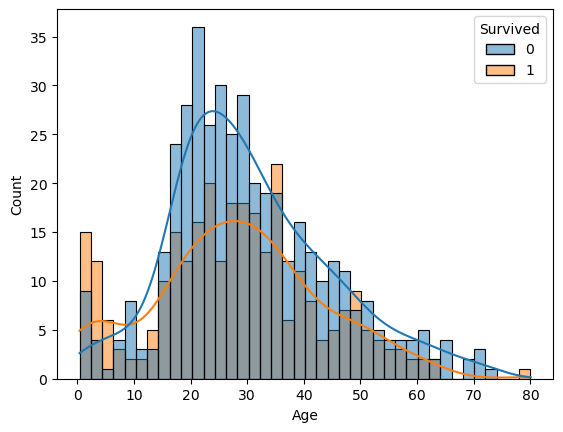

In [26]:
sns.histplot(data=train_df, x='Age', hue=train_df['Survived'].astype(str), bins=40, kde=True)

* Majority passengers were from 18-40 ages.
* Children had more chance to survive thans other ages.

#### `Fare`

In [27]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

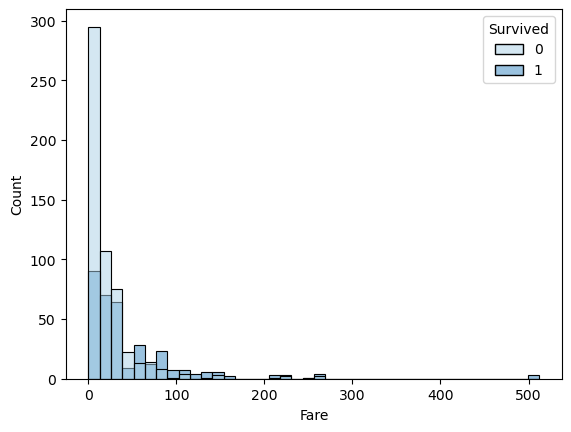

In [28]:
sns.histplot(data=train_df, x='Fare', hue=train_df['Survived'].astype(str), bins=40, palette='Blues')

<Axes: xlabel='Fare', ylabel='count'>

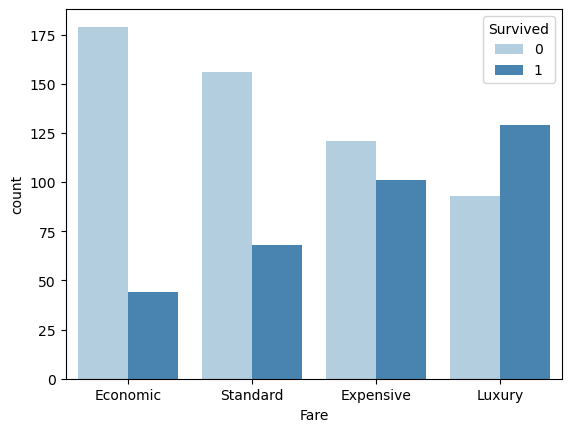

In [29]:
# To name for interquartile (0-25%; 25-50%, 50-75%, 75-100%)

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'].astype(str), palette='Blues')

In [30]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

* **Distribution of Fare**
    - Fare does not follow a normal distribution and has a huge spike at the price range `[0-100$]`
    - The distribution is skewed to the left with 75% of the faire paid under `31$` and a max paid fare of `512$`
    

* **Quartile plot**
    - Passsenger with Luxery and Expensive fare will have more chance to survive


<div style="text-align:left; color:blue">
    <h2>4. Feature Engineering & Data Wrangling </h2>
    <a class="anchor" id="ida"></a>
</div>

<div style="text-align:left; color:green">
    <h3>4.1 Feature Engineering</h3>
</div>

#### Name
- Regular Expression

In [31]:
train_df['Name'].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [32]:
import re #regular expressions

def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.")
    #if name is None:
        #print(name)
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [33]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Jonkheer          1
the Countess      1
Ms                1
Sir               1
Don               1
Capt              1
Mme               1
Name: Title, dtype: int64

In [34]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [35]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [36]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [37]:
#sns.countplot(data=train_df, x='Title', hue=train_df['Survived'].astype(str));

**Group the title into broader categories**

In [38]:
def group_title(title):
    if title in ['Mr','Miss','Mrs','Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'
    
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))
#train_df['Title'].value_counts()
#test_df['Title'].value_counts()

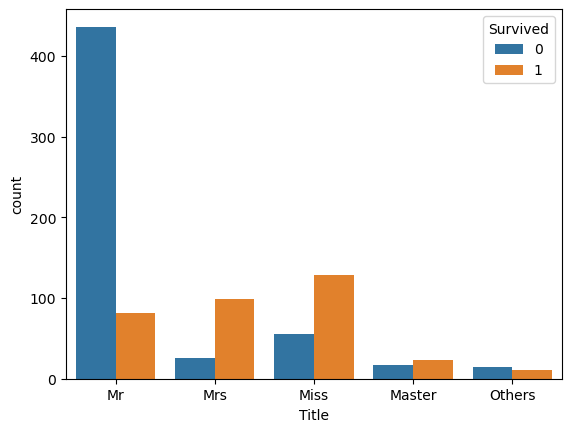

In [39]:
sns.countplot(data=train_df, x='Title', hue=train_df['Survived'].astype(str));

#### Family
- `SibSp`, `Parch`

In [40]:
# Concat two columns
train_df['Family_Size'] = train_df['SibSp'].astype(int) + train_df['Parch'].astype(int) + 1
test_df['Family_Size'] = test_df['SibSp'].astype(int) + test_df['Parch'].astype(int) + 1

<Axes: xlabel='Family_Size', ylabel='count'>

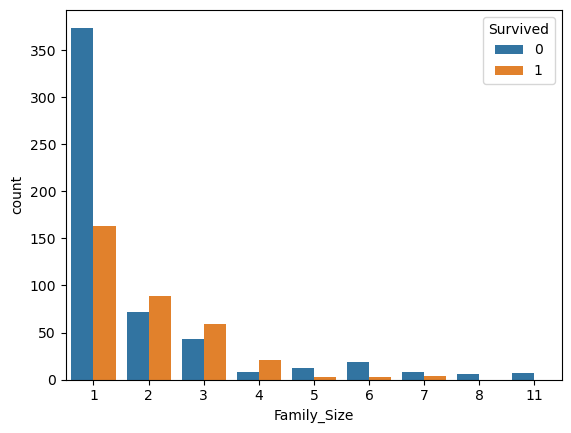

In [41]:
sns.countplot(data =train_df, x='Family_Size', hue= train_df['Survived'].astype(str))

**Feature Engineering for Family Size**
- Family size is calculated by adding the number of siblings/spouses (`SibSp`) and the number of parents/children (`Parch`) each passengers has.
- The family size is then categorized into groups (`Solo`, `Small`, `Medium`, and `Large`) based on predefined bins.

In [42]:
# Groupe size of family
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo','Small','Medium','Large']) #[0,1],[1,4],[4,6],[6,20]
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo','Small','Medium','Large']) #[0,1],[1,4],[4,6],[6,20]

<Axes: xlabel='Family_Cat', ylabel='count'>

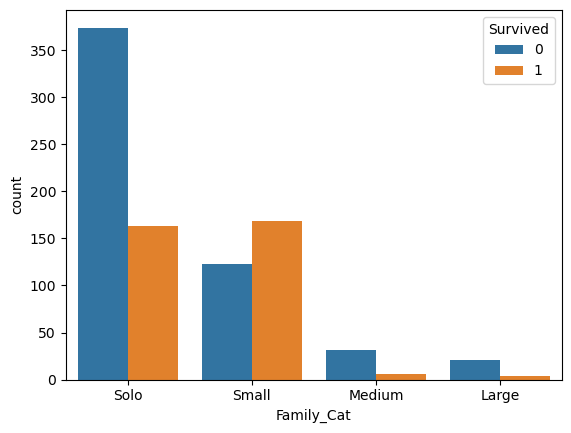

In [43]:
sns.countplot(data =train_df, x='Family_Cat', hue= train_df['Survived'].astype(str))

By observing the countplot, we can see an interesting trend: the survival rate of passengers traveling alone or with a small family is significantly higher than that of passengers belonging to medium or large families.

This observation suggests that passengers traveling alone or with a limited number of family members potentially had a better chance of survival.

<div style="text-align:left; color:green">
    <h3>4.2 Data Wrangling</h3>
</div>

In [44]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features

In [45]:
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [46]:
def display_missing(df, feature_cols):
    for col in feature_cols:
        #check missing values
        missing_count = df[col].isnull().sum()
        
        if missing_count > 0 :
            print(f"{col} has {missing_count} missing value.")
display_missing(train_df, feature_cols)

Age has 177 missing value.
Embarked has 2 missing value.


In [47]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0 :
            print(f"{col} has {missing_count*100/n_rows:2f}% missing value.")
            
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.865320% missing value.
Embarked has 0.224467% missing value.
Age has 20.574163% missing value.
Fare has 0.239234% missing value.


#### Filling missing values

#### `Age`
- Filling missing values with `median` of whole dataset


In [48]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

**Filling the missing values in Age with the medians of Sex and Pclass groups in the `Age` column of both the training and test datasets**

In [49]:
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

In [50]:
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

In [51]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 0.224467% missing value.
Fare has 0.239234% missing value.


**Setting up a preprocessing pipeline to prepare the features for ML modeling**
- Features are extrated from the training dataframe using `feature_cols` list, which contains both numerical and categorical features.
- The target variable, `Survived`, is extracted as `y`.
- Similarly, features are extracted from the test dataframe and stored in X_test.

In [52]:
X = train_df[feature_cols]
y = train_df['Survived']

In [53]:
X_test = test_df[feature_cols]

**Preprocessing Pipeline with two type of transformers are defined within the pipeline**

In [54]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [55]:
# Numerical Transformer
num_transformer = Pipeline(steps =[
    # fill missing values by their median
    ('imputer', SimpleImputer(strategy='median')),
    # standardize them by using StanderScaler
    ('scaler', StandardScaler())
])

# Categorical Tranformer
cat_transformer = Pipeline(steps=[
    # fill missing values with the most frequent value of each feature
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # convert categorical features into one-hot encoded vectors
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

These transformers are combined into a `ColumnTransformer`, which applies the appropriate preprocessing steps to each type of feature

In [56]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

The `preprocessor` is fitted to the training data(`X`), which learns the statics needed for preprocessing.

In [57]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

Transforming Features

In [58]:
X = preprocessor.transform(X) # Separate X into X_train and X_validation, X -> X_train, X_val

In [59]:
X_test = preprocessor.transform(X_test)

<div style="text-align:left; color:blue">
    <h2>5. Model Training</h2>
</div>

In [60]:
from sklearn.model_selection import train_test_split

**Splitting Data**

The dataset is split into training and validation sets. The training set (`X_train`, `y_train`) comprise 80% of the data, while the validation set (`X_val`, `y_val`) comprises the remaining 20%

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [62]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [63]:
X_test.shape

(418, 19)

In [64]:
# binary classification
# output return proprobility
#sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

**Logistic Regression**

In [65]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [66]:
log_reg.score(X_val, y_val)

0.8603351955307262

In [67]:
y_pred = log_reg.predict(X_val)

In [68]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8596491228070176, 0.7424242424242424)

In [69]:
print(classification_report(y_val, y_pred))
#F1 = Harmonic Mean of Precision & Recall

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       113
           1       0.86      0.74      0.80        66

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



**Polynomial Features**

In [70]:
from sklearn.preprocessing import PolynomialFeatures

- y = a*x1 + b*x2 + bias -> y = a*x1^2 + b*x2^2 + c x1*x2 + bias

In [71]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val) #not fit validation, just train

In [72]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [73]:
poly_log_reg.score(poly_features_X_val, y_val)

0.88268156424581

**Decision Tree Classifier**

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8,random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [76]:
decision_tree.score(X_val,y_val)

0.8770949720670391

<div style="text-align:left; color:green">
    <h3>5.1 Cross-validation</h3>
</div>

In [77]:
from sklearn.model_selection import cross_val_score

Both logistic regression and decision tree classifiers are evaluated using 5-fold cross-validation.

In [78]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8,random_state=2022)

In [79]:
lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)
lr_scores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [80]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [81]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)

In [82]:
dt_scores.mean(), dt_scores.std()

(0.8069801016885318, 0.014586754299604428)

<div style="text-align:left; color:green">
    <h3>5.2 Baseline Model Comparison</h3>
</div>

In [83]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #!pip install xgboost

In [84]:
seed = 2024
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_mectric='logloss', eandom_state=seed)
]

In [85]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # define k-fold:
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.xticks(rotation=45)
        plt.show()
        
        
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deveation']
    
    # Sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
     
    
    return baseline_results

    
generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)

C:\Users\33766\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\33766\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\33766\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\33766\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  war

,Mean,Standard Deveation
model_name,,
LogisticRegression,0.830557,0.027082
LinearSVC,0.829439,0.030381
SVC,0.828310,0.022386
KNeighborsClassifier,0.818222,0.030301
AdaBoostClassifier,0.817092,0.024958
XGBClassifier,0.809240,0.024706
RandomForestClassifier,0.806986,0.023033
ExtraTreesClassifier,0.789059,0.035120
DecisionTreeClassifier,0.763198,0.025431


- Logistic Regression shows the best average performance with an accuracy score of ~83%. This mean that the logistic regression model correctly predicts passenger survival in about 83% of cases.
- Logistic Regression also exhibits the lowest performance variability, with a standard deviation of ~2.7%, indicating relatively high consistency in the model's predictions across different cross-validation folds.
- Linear SVC and SVC closely follow with average scores of around 83% and 82.8% respectively.
- Other models have slightly lower performances, with average scores ranging from 76% to 82%.